# Chapter 03: Data visualization

```{contents} Table of Contents
:depth: 3
```

Data visualization is another piece of exploratory data analysis. 
Visuals are, technically, a mapping from a dataset to some graphic.
They are meant as summaries and not meant to be an exhaustive tabulation of all data points in a data frame. 

The foundation for plotting in Python is [matplotlib](https://matplotlib.org/stable/). 
We'll also explore the [seaborn visualization library](https://seaborn.pydata.org/), and, in the homework, you'll learn about another popular viz tool called [altair](https://altair-viz.github.io/). 


As our example, we'll use a classic dataset called the "heart disease" dataset.
The abstract for this dataset reads

*This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.*

In [21]:
import pandas as pd 

heart_disease = pd.read_csv("heart.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Matplotlib 

Matplotlib was created by neurobiologist [John Hunter](https://en.wikipedia.org/wiki/John_D._Hunter) and since that time has grown to be the most popular plotting framework for Python.
All the objects in a matplotlib plot are called "artists".
There are two paradigms for generating a matplotlib plot: (1) object-oriented or (2) pyplot-style. 

### Object oriented

The object-orientated style of producing matplotlib figures is to generate, and interact, with the figure and axes objects.
The figure is considered the entire visualization.
The figure typically contains one or more axes.

To create a blank figure in matplotlib using this style you use the syntax
```fig,ax = plt.subplots()```. 
This creates an empty figure pane and returns two objects: (1) the figure and (2) a single axis. 

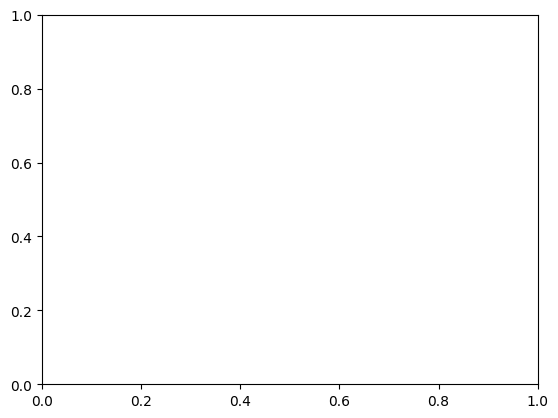

In [22]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

When the function ```plt.subplots``` is not given any arguments, the default is to create a single axis.
In matplotlib you can specify several axes easily. 
Axes are specified by dividing the figure into $r$ rows and $c$ columns. 
A figure object is returned and a matrix that contains all of the axes. 

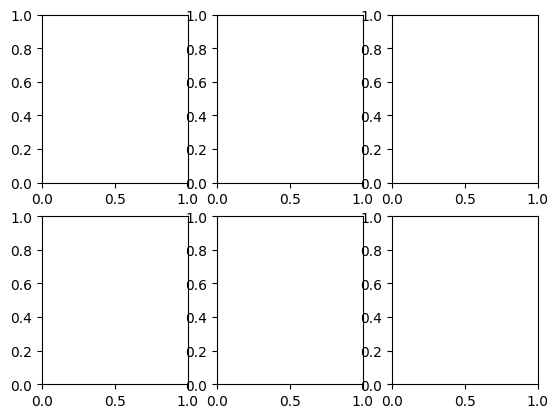

In [23]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,3)

In [24]:
print(axs[0,:])

[<Axes: > <Axes: > <Axes: >]


### Histogram - 1d

The first graphic we will build is a histogram. 
Given a dataset $\mathcal{D} = (d_{1},d_{2},\cdots,d_{n})$ of amount or balance-type data, a histogram completes the following algorithm:
1. Sort the values of $\mathcal{D}$
2. Partition the values into $B$ bins. Each bin has a lower bound $l$ and upper bound $u$
3. For each bin $b$ in $B$ with lower bound $l_{b}$ nad upper bound $u_{b}$
   1. Count the number of data points and call this $c_{b}$
   2. Draw a rectangle where the left edge of the rectangle is at $l$, the right edge is at $u$, adn the height is at $c_{b}$.


The histogram summarizes what values are most frequently observed, what values are rarely observed, and what values are not at all observed. 
Histograms can give the audience a quick summary of what values they may expect to see in the future from additional data points.
Care must be taken when deciding on a partition. 
Different partitions will lead to different histogram visuals. 

Lets look at the histogram for age in the heart disease dataset.
We will use the function ```hist``` in matplotlib. 
In the object-orientated style hist is an attribute of the axes in which you want to draw the graph. 

(array([  4.,  39., 109., 125., 120., 205., 219., 149.,  46.,   9.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

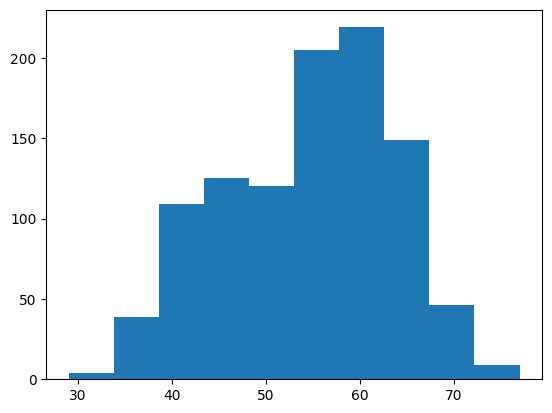

In [25]:
fig,ax  = plt.subplots()
ax.hist( heart_disease["age"] )

If we wanted to plot, side by side, a histogram of age and a histogeam of resting beats per second for each patient, we can build a figure with two axes. We can place the histogram for age in the first axes and the histogram for beats per second in the second axis. 

(array([ 33., 140., 232., 251., 192.,  89.,  43.,  28.,  10.,   7.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

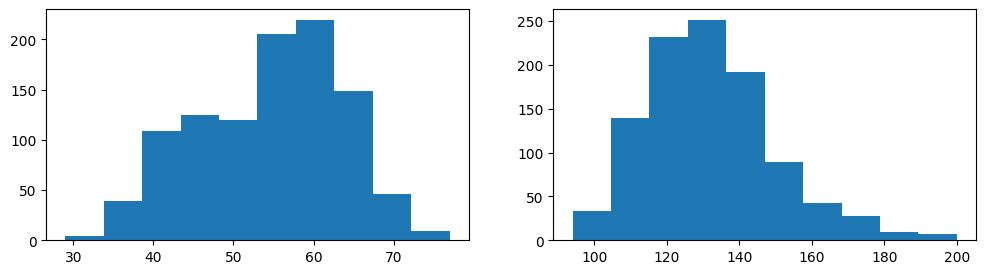

In [26]:
fig,axs = plt.subplots(1,2, figsize=(12,3)) #<-- one row and two columns 
axs[0].hist(heart_disease["age"])
axs[1].hist(heart_disease["trestbps"])

### Labels and limits
This figure presents several communication challenges that we can address in matplotlib. 
First, there are no axes labels. 
The reader cannot understand that the first plot corresponds to patient age and the second to resting beats per second (of their heart). 

To add a label to the horizontal axes we will use ```set_xlabel``` and to label the verical axes we will use ```set_ylabel```. 

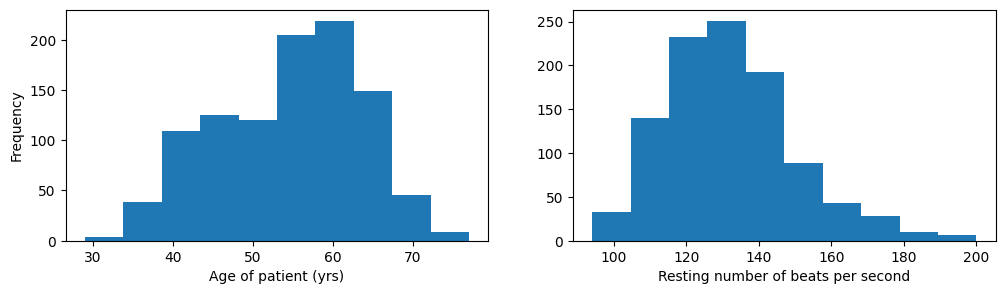

In [27]:
fig,axs = plt.subplots(1,2, figsize=(12,3)) #<-- one row and two columns 
axs[0].hist(heart_disease["age"])
axs[0].set_xlabel("Age of patient (yrs)")

axs[1].hist(heart_disease["trestbps"])
axs[1].set_xlabel("Resting number of beats per second")

axs[0].set_ylabel("Frequency")

plt.show()

Because these two plots are side by side and share a common vertical label of frequency, lets set the "y limits" (the smallest value and the largest value to present to the reader) to be the same for both axes. 
We can do that with the ```set_ylim``` function. 

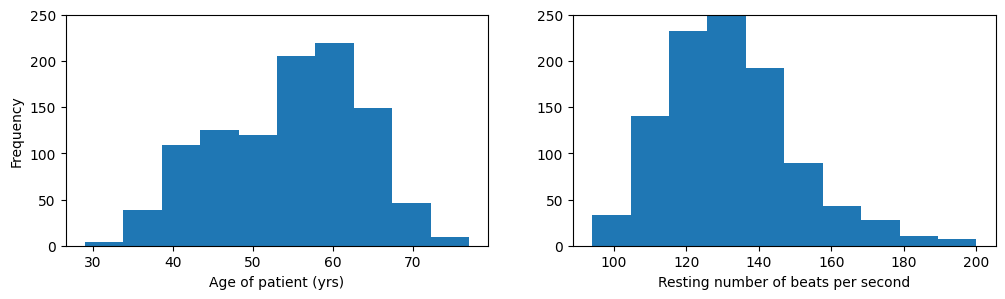

In [28]:
fig,axs = plt.subplots(1,2, figsize=(12,3))             #<-- one row and two columns 

axs[0].hist(heart_disease["age"])                       #<-- histogram for age 
axs[0].set_xlabel("Age of patient (yrs)")               #<-- label x axis
axs[0].set_ylim(0,250)                                  #<-- set y limits

axs[1].hist(heart_disease["trestbps"])                  #<-- histogram for beats per second
axs[1].set_xlabel("Resting number of beats per second") #<-- label x axis
axs[1].set_ylim(0,250)                                  #<-- set y limits

axs[0].set_ylabel("Frequency")                          #<-- label y axis  

plt.show()                                              #<-- display the figure

### Box and whisker plots

The Box and whisker plot is a summarizing visualization that maps a dataset $\mathcal{D}$ to the following summary metrics: the median, 25th and 75th percentiles (and so then the interquartile range), a summary of values that are two times the interquartile range, and an individual representation of any values beyond this range. 

Like the histogram, the box and whisker plot aims to present typical values (median), dispersion (interquartile range), and also values that are rare. 
An advantage that the boxplot has, when compared to a histogram, is that a data scientist can explore how summary metrics for some amount/balance data compare across groups. 

For example, suppose we wish to compare cholesterol levels of patients who have versus who have not presented with the heart condition angina. 
We can use selection and indexing techniques that we learned in the last chapter to select patients based on angina.

In [29]:
yes_angina = heart_disease.loc[heart_disease.exang==1]
no_angina  = heart_disease.loc[heart_disease.exang==0]

We can construct a boxand whisker plot for both groups using the matplotlib function ```boxplot```.

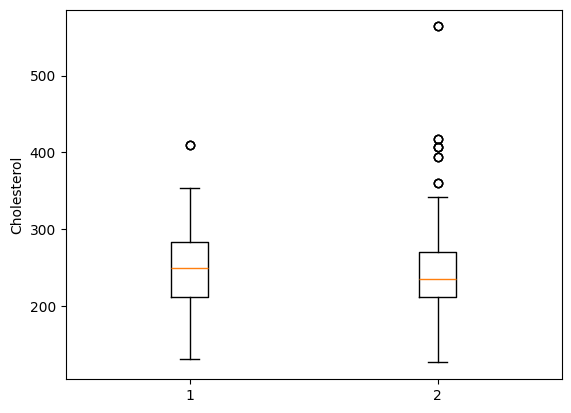

In [30]:
fig,ax = plt.subplots()
ax.boxplot( [yes_angina["chol"], no_angina["chol"]])
ax.set_ylabel("Cholesterol")
plt.show()

### Tick labels
Like with the histogram, we are left with a problem communicating which boxplot corresponds to which angina status. 
The values "1" and "2" are ambiguous and confusing. 

Every matplotlib generates horizontal "ticks" (the small markers above the values 1 and 2) and vertical ticks (the small markers to the left of the values: 200,300,400,500). 
Matplotlib also generates horizontal tick labels (the 1 and 2) and vertical tick labels (the 200,300,400,500). 

We can set horizontal tick using the ```set_xticks``` command.
The input is a list of values for where to draw the tick markers. 
We can also add more descriptive labels corresponding to each tick with the command ```set_xticklabel```.
The input is a list of strings. 

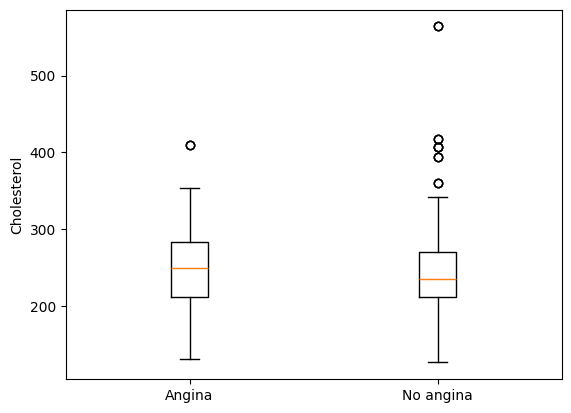

In [31]:
fig,ax = plt.subplots()
ax.boxplot( [yes_angina["chol"], no_angina["chol"]])
ax.set_ylabel("Cholesterol")

ax.set_xticks([1,2])
ax.set_xticklabels(["Angina","No angina"])

plt.show()

Adding in these xtick labels much better describes that the first boxplot corresponds to patients who have experienced angina and that the second box describes patients who have not had prior angina. 

### Visualizing association 

Given a dataset $\mathcal{D} = ( (x_{1},y_{1}),(x_{2},y_{2}),(x_{3},y_{3}),\cdots, (x_{n},y_{n}) )$, 
an association between variables $X$ and $Y$ measures the tendency for values of $X$ to provide information about the values of $Y$.  This is a vague definition because there are many ways to discuss associations. 

Visualizations can be a useful summary of potential associations. 
The **scatter plot** can describe for the reader a potential association between two amount or balance type outcomes. 

As an example, we will use a scatter plot to visualize the potential association between a patient's age and cholesterol level. 
In python, we use the ```scatter``` function. 
The first input specifies values on the horizontal axis and the second input specifies inputs on the vertical axis. 

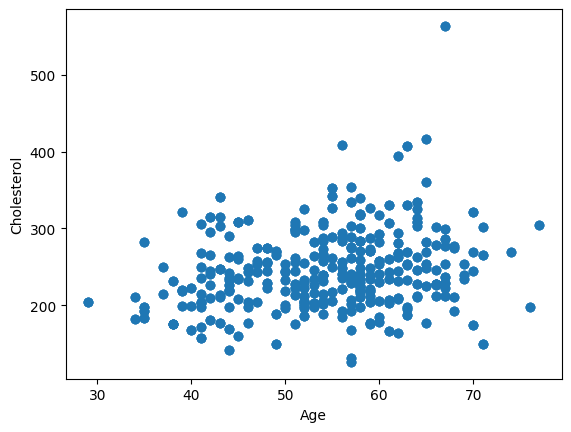

In [32]:
fig,ax = plt.subplots()
ax.scatter(heart_disease["age"], heart_disease["chol"])

ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol")

plt.show()

We see that there is a potential association between age and cholesterol level. 
Larger values for age tend to indicate that we will collect larger values for cholesterol.

### Barplot 

Like the box and whisker plot, the **baplot** is used to present a summary metric stratified by groups. 
Common uses are to present a measure of central tendency for different participant groups.
However, grouping by patients is not the barplot's only use. 
In infectious disease epidemiology, the group can be time. 

Below is an example of a barplot for patient's median cholesterol levels with and without angina. 

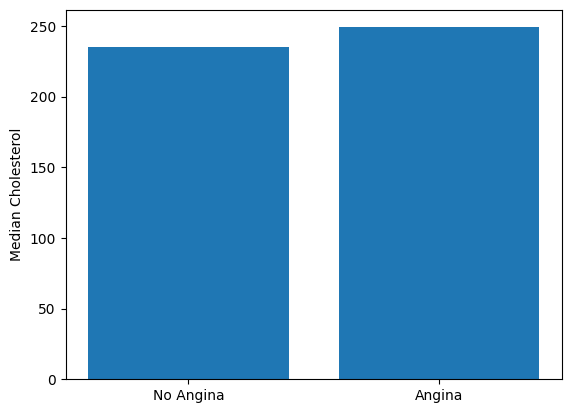

In [33]:
import numpy as np 
avg_cholesterol__yes_angina = np.median(yes_angina["chol"])
avg_cholesterol__no_angina  = np.median(no_angina["chol"])

fig,ax = plt.subplots()

ax.bar([0,1],[avg_cholesterol__no_angina, avg_cholesterol__yes_angina])

ax.set_xticks([0,1])
ax.set_xticklabels(["No Angina","Angina"])

ax.set_ylabel("Median Cholesterol")

plt.show()

## Seaborn 

Matplotlib is not the only statistical visualization framework for Python.
There are many. 
Another popular framework is [seaborn](https://seaborn.pydata.org/).

Seaborn plots operate almost exclusively on pandas dataframes and, so, have been optimized to make plotting visualizations easier for dataframe objects. 
Seaborn emphasizes syntax for quickly changing between different types of visualizations. 
For seaborn, much of the syntax between different visualizations stays the same. 

Lets take a look with our angina and cholesterol example. 
Lets first generate a boxplot with seaborn. 

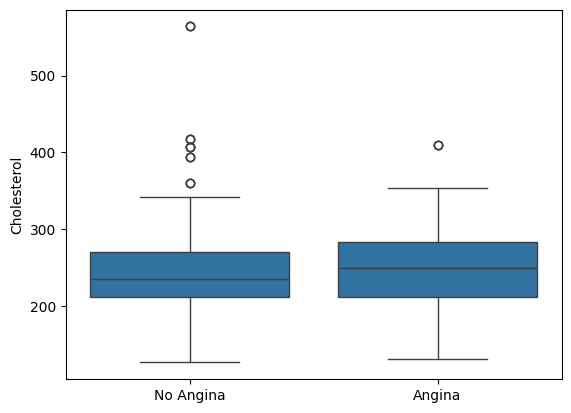

In [43]:
import seaborn as sns

fig,ax = plt.subplots()
sns.boxplot( x    = "exang"       #--Specify what variable is on the horizontal axis
            ,y    = "chol"        #--Specify the variable to summarize on the veritical axis
            ,data = heart_disease #--Specify which dataframe holds the above variables
            ,ax   = ax )          #--Specify the axis in which to produce this plot

ax.set_ylabel("Cholesterol")
ax.set_xlabel("")

ax.set_xticks([0,1])
ax.set_xticklabels(["No Angina","Angina"])

plt.show()